In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
DIR = '/glade/scratch/wchapman/data_for_KJM/' #'/glade/scratch/kjmayer/DATA/CESM2-piControl/daily/'
SST_FINAME = 'SSTK_ERA5_1975_2022_WEC.nc'
DSsst = xr.open_dataset(DIR+SST_FINAME)
DSsst['SSTa']=DSsst['SSTK']-DSsst['SSTK_climo']

In [3]:
DSsst['TS_SSTa']=DSsst['SSTa'].sel(lat=slice(-5,5),lon=slice(190,240)).mean(['lat','lon'])
# perform rolling mean
DSsst['TS_SST_ONI'] = DSsst['TS_SSTa'].rolling(time=90,min_periods=1,center=False).mean()
DSsst['TS_SST_ONI_centered'] = DSsst['TS_SSTa'].rolling(time=90,min_periods=1,center=True).mean()
DSsst['TS_SST_ONI_30'] = DSsst['TS_SSTa'].rolling(time=30,min_periods=1,center=False).mean()
DSsst['TS_SST_ONI_45'] = DSsst['TS_SSTa'].rolling(time=45,min_periods=1,center=False).mean()

In [4]:
SST_FINAME_v2 = 'SSTv2_ERA5_1974_2022.001.nc'
DSsst.to_netcdf(DIR+SST_FINAME_v2)

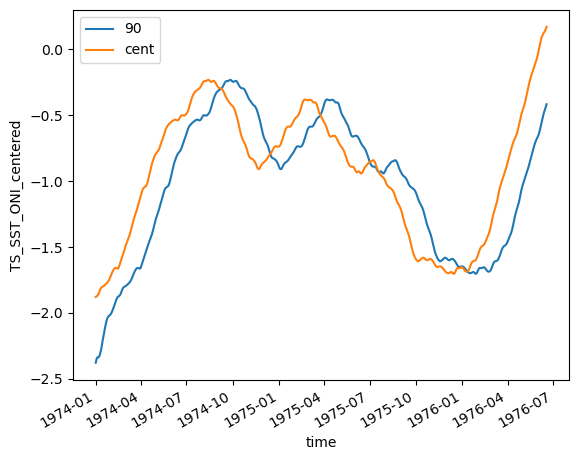

In [5]:
DSsst['TS_SST_ONI'][:900].plot(label='90')
DSsst['TS_SST_ONI_centered'][:900].plot(label='cent')
DSsst['TS_SST_ONI_30'][:900].plot(label='30')
DSsst['TS_SST_ONI_45'][:900].plot(label='45')
plt.legend()